In [11]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [12]:
# Load the data file
file_path = '../data/patient_no_show_dataset.csv'
df = pd.read_csv(file_path)

In [13]:
label_encoder = LabelEncoder()
df_le = df

columns_to_encode = ['gender', 'Ethnicity', 'Socioeconomic Status', 'Appointment No-show']
for column in columns_to_encode:
    df_le[f'{column}_encoded'] = label_encoder.fit_transform(df_le[column])
df_le = df_le.drop(columns=columns_to_encode)

df = df_le

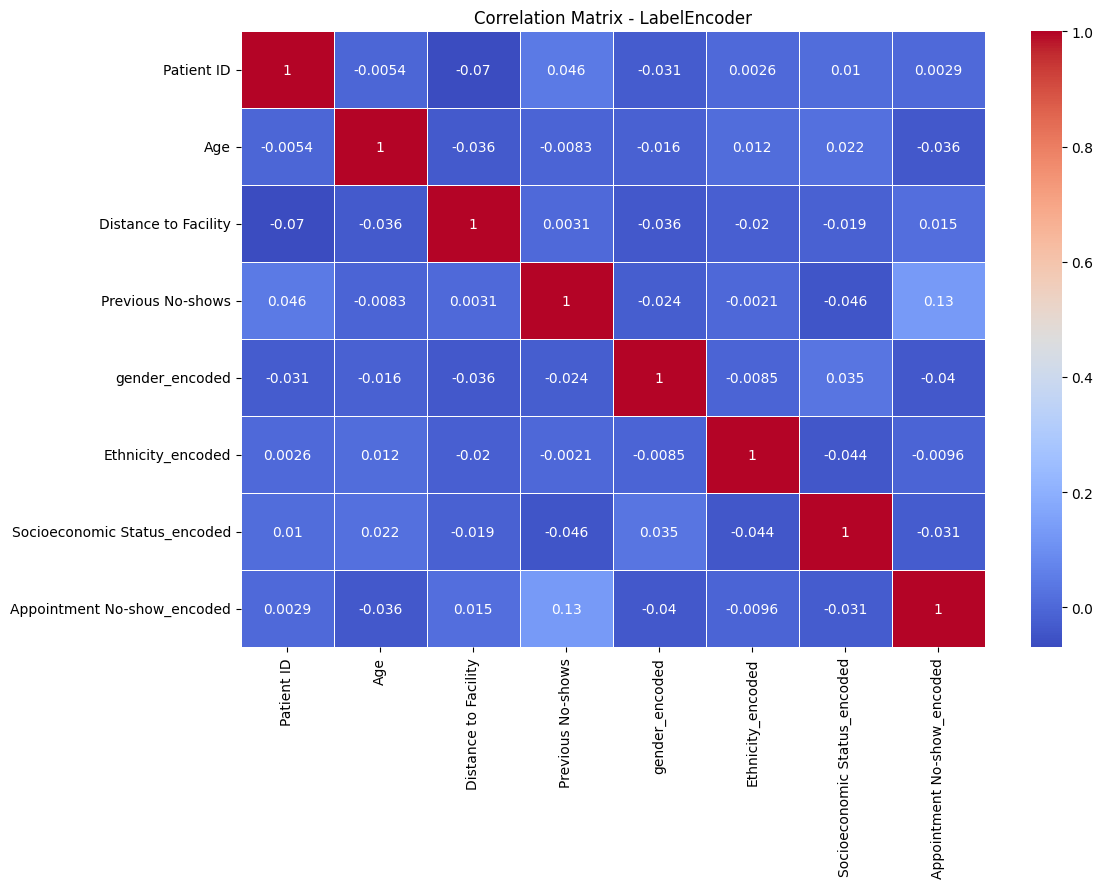

In [14]:
# Generate the correlation matrix
correlation_matrix = df_le.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - LabelEncoder')
plt.show()

/tmp/ipykernel_41327/2678360830.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features, palette='viridis')


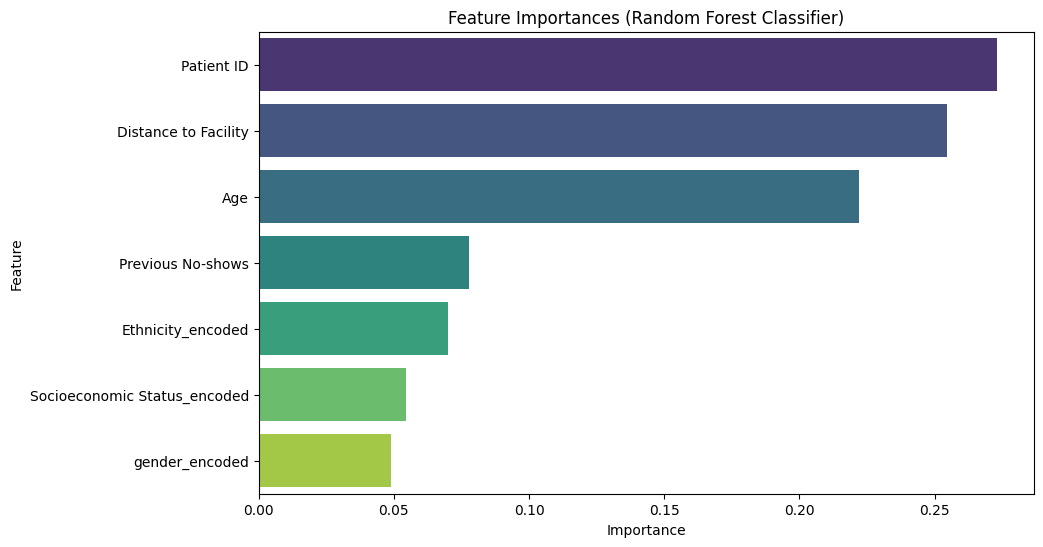

In [15]:
# Prepare data for feature importance analysis - [Extracting the target]
# Assuming the last column is the target variable and all others are features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_
RandomForestClassifier
# Create a DataFrame for visualizing feature importance
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features, palette='viridis')
plt.title('Feature Importances (Random Forest Classifier)')
plt.show()